In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sqlite3 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import tensorflow as tf 
import keras

In [4]:
from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print('X_train shape', x_train.shape)
print('y_train ', y_train.shape)
print('x_test shape ', x_test.shape)
print('y_test shape ', y_test.shape)

X_train shape (60000, 28, 28)
y_train  (60000,)
x_test shape  (10000, 28, 28)
y_test shape  (10000,)


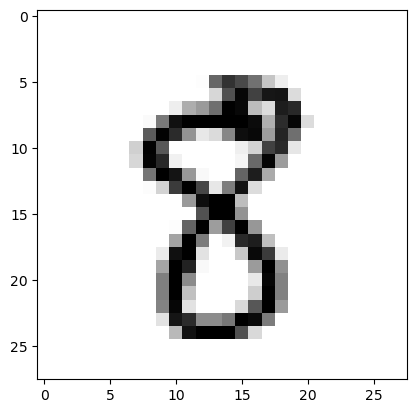

In [17]:
plt.imshow(x_train[46], cmap='binary')
plt.show()

In [24]:
from keras.utils import to_categorical 
a = tf.keras.utils.to_categorical(([0,1,2,3]))
a

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

Transformación de la variable respuesta

In [35]:
from keras.utils import to_categorical 
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10 )
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [136]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [51]:
x_train[46]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        152, 203, 181, 141,  58,  17,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [48]:
x_train_reshaped = np.reshape(x_train,(60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print('X_train_reshape shape', x_train_reshaped.shape)
print('x_test_reshaped shape ', x_test_reshaped.shape)

X_train_reshape shape (60000, 784)
x_test_reshaped shape  (10000, 784)


Normalizar conjunto de datos

In [56]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
e = 1e-12

x_train_norm = (x_train_reshaped - x_mean)/(x_std + e)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + e)

In [62]:
x_test_norm.dtype

dtype('float64')

In [69]:
x_train_est = x_train_reshaped/255
x_train_est.dtype

dtype('float64')

In [71]:
modelo2 = Sequential()
modelo2.add(Dense(128, activation='relu', input_dim=784))
modelo2.add(Dense(10, activation='softmax'))

In [72]:
modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Compliación del modelo

In [73]:
modelo2.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [74]:
historial = modelo2.fit(x_train_norm, y_train_encoded, epochs= 20, validation_split= 0.3, shuffle=True)

Epoch 1/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4095 - accuracy: 0.8799 - val_loss: 0.2649 - val_accuracy: 0.9246
Epoch 2/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2352 - accuracy: 0.9333 - val_loss: 0.2164 - val_accuracy: 0.9404
Epoch 3/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1883 - accuracy: 0.9471 - val_loss: 0.1888 - val_accuracy: 0.9480
Epoch 4/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1588 - accuracy: 0.9555 - val_loss: 0.1672 - val_accuracy: 0.9543
Epoch 5/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1377 - accuracy: 0.9609 - val_loss: 0.1599 - val_accuracy: 0.9555
Epoch 6/20
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1216 - accuracy: 0.9662 - val_loss: 0.1435 - val_accuracy: 0.9599
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1090 - accuracy: 0.9692 - val_loss: 0.1353 - val_accuracy:

In [76]:
loss, accuracy = modelo2.evaluate(x_test_norm, y_test_encoded)
print('Test de accuracy ', round((accuracy*100), 4))
print('Loss ', loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9729
Test de accuracy  97.29
Loss  0.0896356850862503


In [77]:
predic = modelo2.predict(x_test_norm)
print('Shape of preds', predic.shape)

313/313 [==============================] - 1s 2ms/step
Shape of preds (10000, 10)


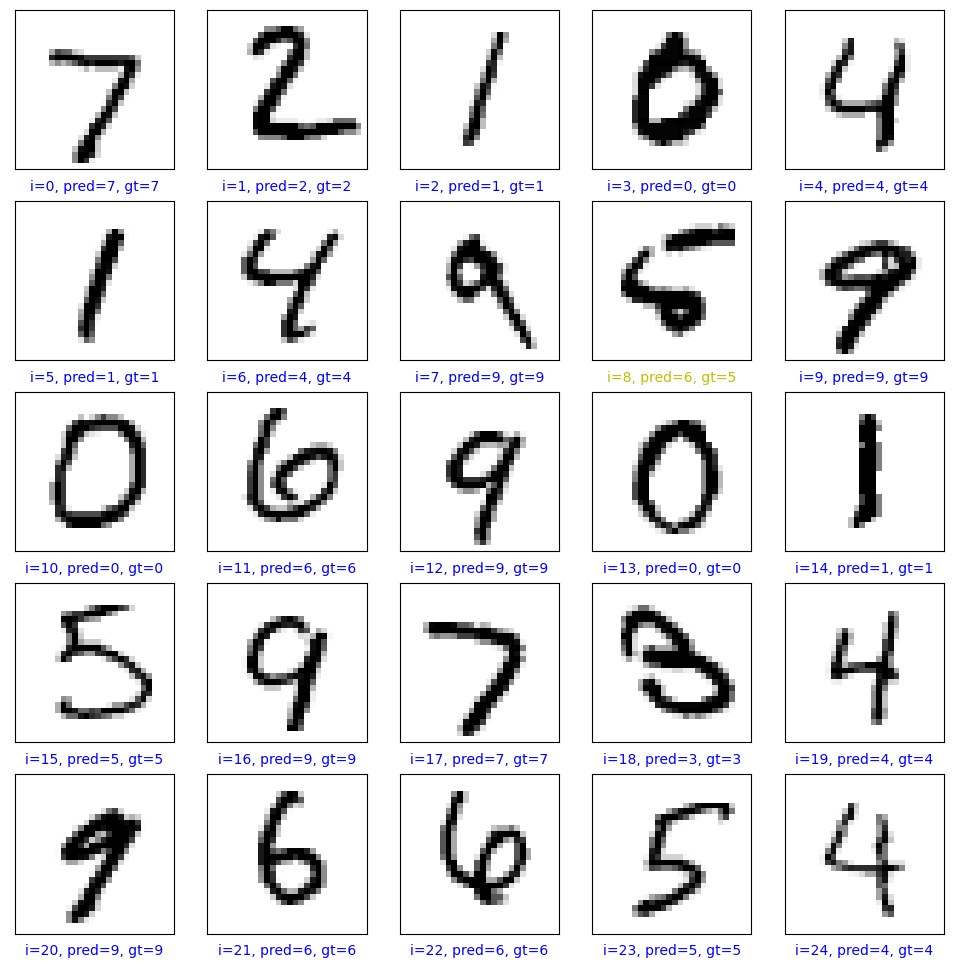

In [86]:
plt.figure(figsize=(12,12))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred1 = np.argmax(predic[i])
    
    gt = y_test[i]
    col = 'b'
    if pred1 != gt:
        col = 'y'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(i, pred1, gt), color = col)
    plt.imshow(x_test[i], cmap='binary')

plt.show()

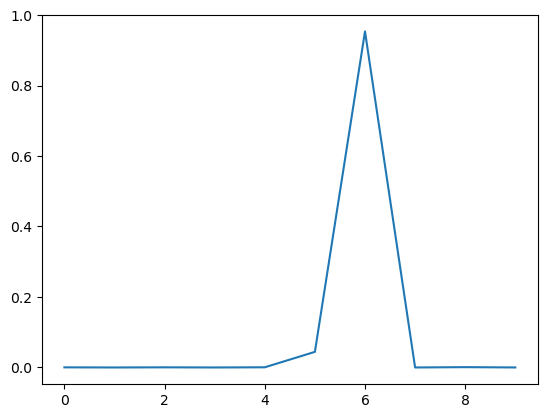

In [94]:
plt.plot(predic[8])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


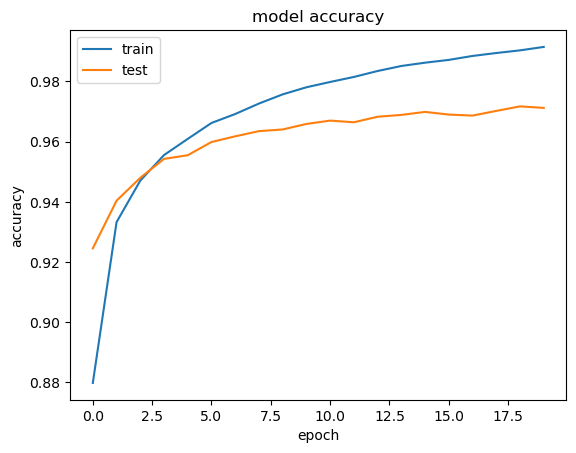

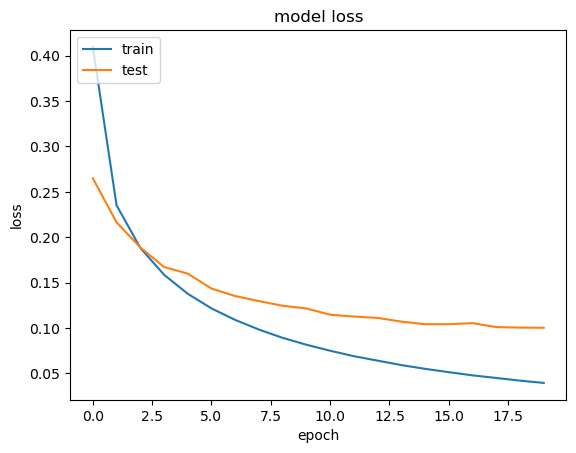

In [95]:
print(historial.history.keys())

#Summarize history for accuracy
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


#Summarize history for loss
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [104]:
import scipy.ndimage as nd 
from skimage import io, color

In [109]:
x = r'C:\Users\santi\OneDrive - Universidad Pedagogica Nacional\El_bosque\Segundo_cuatrimestre\deep_learning\segunda_semana\download.png'
x = x.replace('\\', '/')
img = io.imread(x)
img_gray = color.rgb2gray(img)


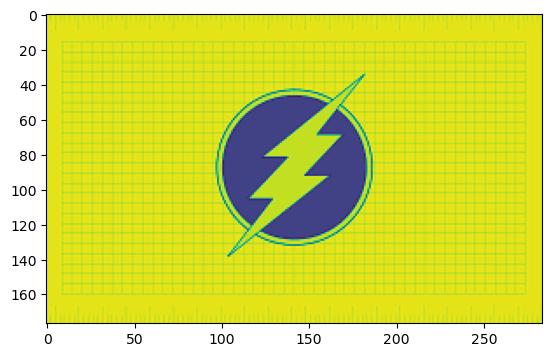

In [110]:
plt.imshow(img_gray)
plt.show()

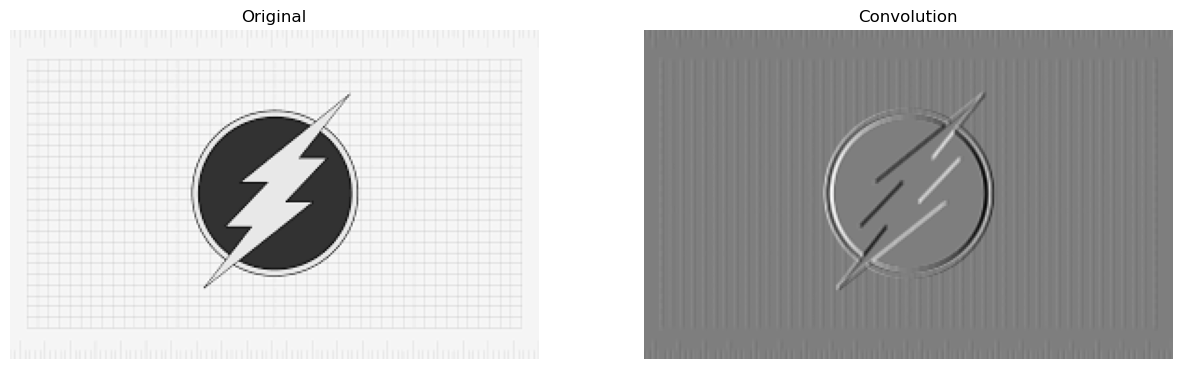

In [113]:
kernel1 = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])

img_k1 = nd.convolve(img_gray, kernel1)
fig, axes = plt.subplots(1,2, figsize = (15, 10))
axes[0].imshow(img_gray, cmap = plt.cm.gray)
axes[0].set_title('Original')
axes[0].axis('Off')
axes[1].imshow(img_k1, cmap = plt.cm.gray)
axes[1].set_title('Convolution')
axes[1].axis('Off')
plt.show()


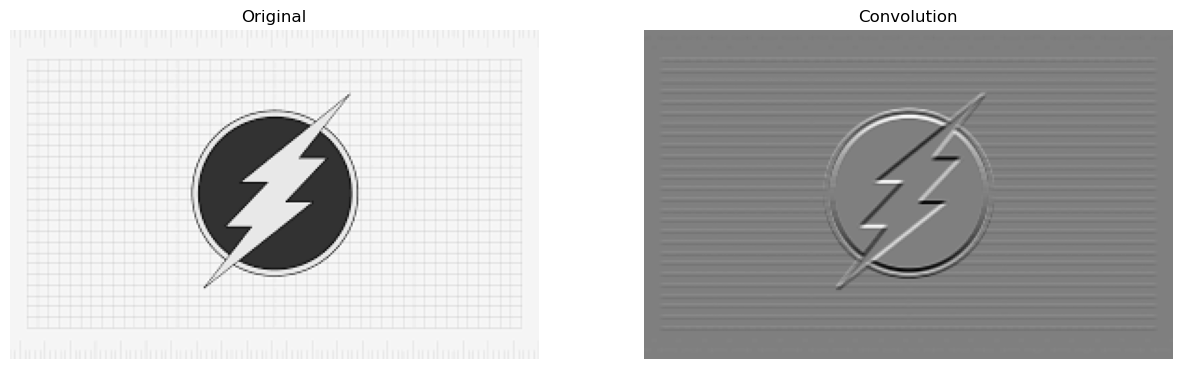

In [114]:
kernel2 = np.array([[-1,-1,-1],
                    [0, 0 , 0],
                    [1,  1, 1]])

img_k2 = nd.convolve(img_gray, kernel2)
fig, axes = plt.subplots(1,2, figsize = (15, 10))
axes[0].imshow(img_gray, cmap = plt.cm.gray)
axes[0].set_title('Original')
axes[0].axis('Off')
axes[1].imshow(img_k2, cmap = plt.cm.gray)
axes[1].set_title('Convolution')
axes[1].axis('Off')
plt.show()

In [122]:
from keras.models import Sequential
from keras.layers import MaxPooling2D 
image = np.array([[11, 20, 1, 6],
                  [3, 11, 9, 6],
                  [4, 3, 1, 1],
                  [16, 9 ,2 ,2]])


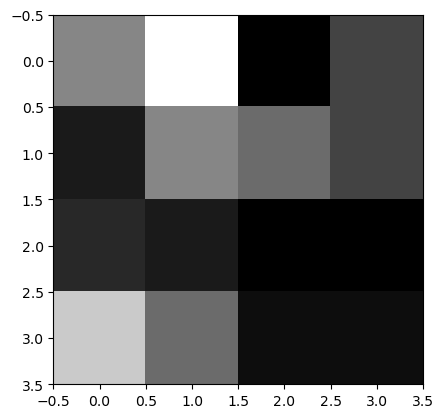

In [125]:
plt.imshow(image, cmap='gray')
plt.show()

image = image.reshape(1,4,4,1)

In [134]:
# Definimos un modelo que contiene una sola capa pooling
model = Sequential(
    [MaxPooling2D (pool_size = 2, strides =2)])

# Generamos la salida
output = model.predict(image)

1/1 [==============================] - 0s 55ms/step


[[20  9]
 [16  2]]


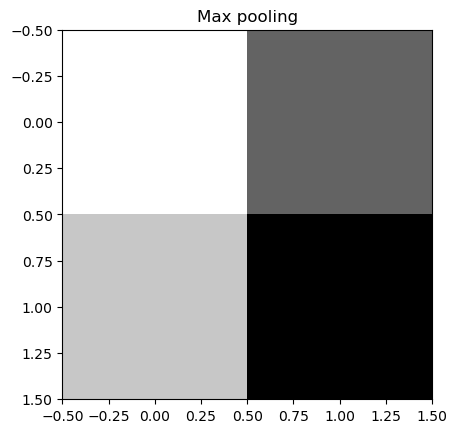

In [135]:
# Imprimimos ambas imagenes resumidas
output = np.squeeze(output)
print(output)

plt.imshow(output, cmap="gray")
plt.title("Max pooling")
plt.show()